# Energy Consumption using Linear Regression

#### Step 1 : Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [17]:
data = pd.read_csv('consume.csv',index_col='date')
data

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
date,,,,,,,,,,,,,,,,,,,,,
02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,74.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,69.0,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,68.1,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01/12/2020 00:00:00,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,100.4,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
02/12/2020 00:00:00,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,101.8,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
03/12/2020 00:00:00,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,103.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6


#### Step 2 :  Analyze the data

In [18]:
data.isnull().sum()

Punjab               0
Haryana              0
Rajasthan            0
Delhi                0
UP                   0
Uttarakhand          0
HP                   0
J&K                  0
Chandigarh           0
Chhattisgarh         0
Gujarat              0
MP                   0
Maharashtra          0
Goa                  0
DNH                  0
Andhra Pradesh       0
Telangana            0
Karnataka            0
Kerala               0
Tamil Nadu           0
Pondy                0
Bihar                0
Jharkhand            0
Odisha               0
West Bengal          0
Sikkim               0
Arunachal Pradesh    0
Assam                0
Manipur              0
Meghalaya            0
Mizoram              0
Nagaland             0
Tripura              0
dtype: int64

#### Step 3 :  Exploratory Data Analysis (EDA)

In [19]:
data.describe()

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,...,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,141.145527,138.333598,218.443340,83.380716,314.036382,36.157058,26.568191,44.264016,4.141551,83.877137,...,80.464612,138.708151,1.289463,2.109145,24.960040,2.494632,5.643738,1.706362,2.162425,4.085487
std,56.977361,38.106593,27.421615,25.915357,66.516960,6.705108,4.807040,4.769391,1.143422,10.130427,...,10.905131,27.849180,0.363565,0.231132,4.732684,0.223141,0.717257,0.144760,0.145174,0.751047
min,56.100000,64.800000,105.800000,41.800000,186.800000,16.800000,11.800000,17.800000,2.200000,37.200000,...,51.100000,51.500000,0.300000,1.100000,12.200000,1.500000,3.300000,1.200000,1.400000,1.400000
25%,104.000000,114.800000,205.800000,63.500000,263.650000,33.800000,25.600000,41.550000,3.300000,75.700000,...,71.650000,114.650000,1.100000,2.000000,22.100000,2.400000,5.300000,1.600000,2.100000,3.500000
50%,118.300000,126.800000,222.900000,72.700000,290.000000,37.000000,28.000000,44.100000,3.800000,82.600000,...,79.800000,131.200000,1.200000,2.200000,23.500000,2.500000,5.800000,1.700000,2.200000,3.900000
75%,162.500000,158.100000,237.600000,105.800000,370.550000,40.350000,29.700000,47.350000,4.900000,91.600000,...,88.400000,164.750000,1.400000,2.200000,27.600000,2.600000,6.100000,1.800000,2.200000,4.600000
max,300.000000,237.200000,278.000000,147.100000,471.800000,53.200000,34.000000,54.200000,7.400000,111.600000,...,113.000000,198.500000,2.800000,2.700000,38.000000,3.200000,6.900000,2.200000,2.700000,6.600000


In [20]:
data.shape

(503, 33)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, 02/01/2019 00:00:00 to 05/12/2020 00:00:00
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Punjab             503 non-null    float64
 1   Haryana            503 non-null    float64
 2   Rajasthan          503 non-null    float64
 3   Delhi              503 non-null    float64
 4   UP                 503 non-null    float64
 5   Uttarakhand        503 non-null    float64
 6   HP                 503 non-null    float64
 7   J&K                503 non-null    float64
 8   Chandigarh         503 non-null    float64
 9   Chhattisgarh       503 non-null    float64
 10  Gujarat            503 non-null    float64
 11  MP                 503 non-null    float64
 12  Maharashtra        503 non-null    float64
 13  Goa                503 non-null    float64
 14  DNH                503 non-null    float64
 15  Andhra Pradesh     503 non-null    float64
 1

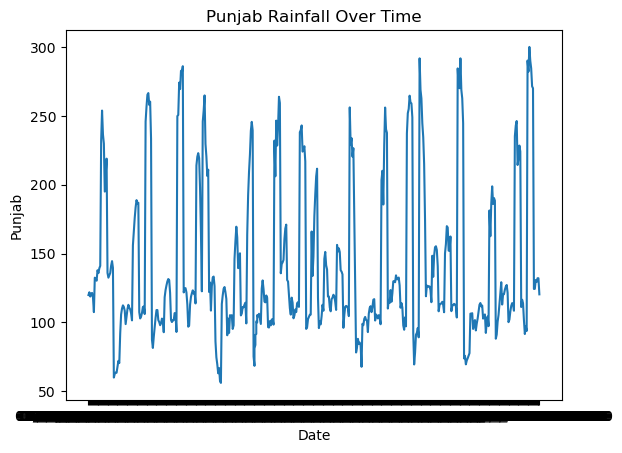

In [22]:
# Example EDA using a line plot
plt.plot(data.index, data['Punjab'])
plt.xlabel('Date')
plt.ylabel('Punjab')
plt.title('Punjab Rainfall Over Time')
plt.show()

# Perform similar EDA for other columns


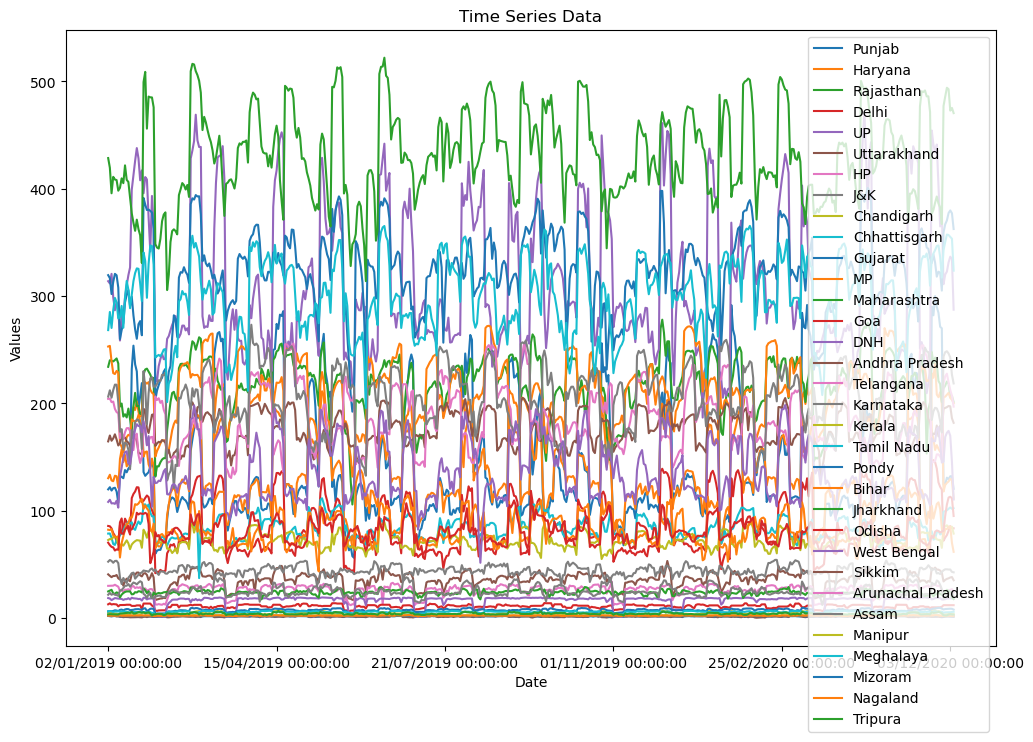

In [23]:
# Line plot for each column
data.plot(figsize=(12, 8))
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Time Series Data')
plt.show()

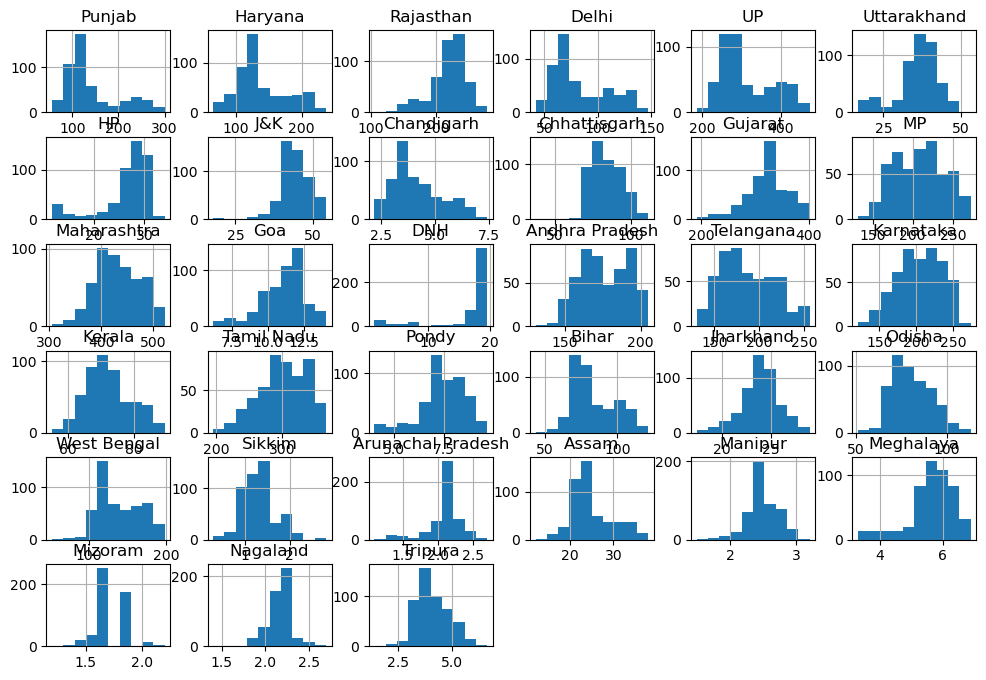

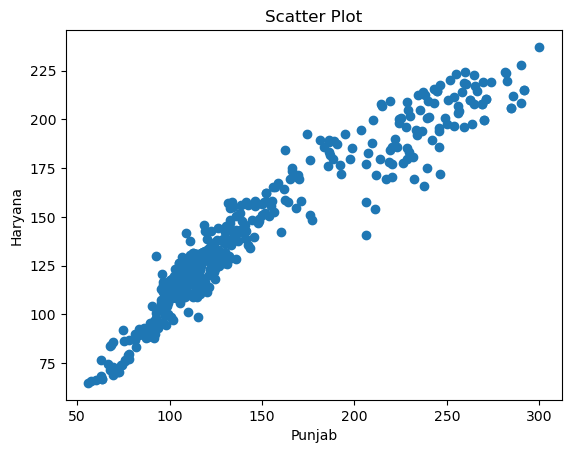

In [24]:
# Histogram for each column
data.hist(figsize=(12, 8))
plt.show()

# Scatter plot for two variables
plt.scatter(data['Punjab'], data['Haryana'])
plt.xlabel('Punjab')
plt.ylabel('Haryana')
plt.title('Scatter Plot')
plt.show()